# LTFS Top-up loan Up-sell prediction

A **loan** is when you **receive the money from a financial institution in exchange for future repayment of the principal, plus interest**. Financial institutions provide loans to the industries, corporates and individuals. The interest received on these loans is one among the main sources of income for the financial institutions.

A **top-up loan**, true to its name, is **a facility of availing further funds on an existing loan**. When you have a loan that has already been disbursed and under repayment and if you need more funds then, you can simply avail additional funding on the same loan thereby minimizing time, effort and cost related to applying again.

LTFS provides it’s loan services to its customers and is interested in selling more of its Top-up loan services to its existing customers so they have decided **to identify when to pitch a Top-up during the original loan tenure**.  If they correctly **identify the most suitable time to offer a top-up**, this will ultimately lead to more disbursals and can also help them beat competing offerings from other institutions.


To understand this behaviour, LTFS has provided data for its customers containing the information whether that particular customer took the Top-up service and when he took such Top-up service, represented by the target variable Top-up Month.



You are provided with two types of information: 



  > 1. **Customer’s Demographics :** The demography table along with the target variable & demographic information contains variables related to Frequency of the loan, Tenure of the loan, Disbursal Amount for a loan & LTV.


  > 2. **Bureau data :**  Bureau data contains the behavioural and transactional attributes of the customers like current balance, Loan Amount, Overdue etc. for various tradelines of a given customer

As a data scientist, LTFS  has tasked you with building a model given the Top-up loan bucket of 128655 customers along with demographic and bureau data, predict the right bucket/period for 14745 customers in the test data.

Important Note

**Note -** feasibility of implementation of top solutions in real production scenario will be considered while adjudging winners and can change the final standing for Prize Eligibility

### Evaluation
The evaluation metric is **macro_f1_score across** all entries in the test set.


### 1. Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load Dataset

In [2]:
# Customer Demographic Dataset

train_demo = pd.read_excel("train_data.xlsx")
test_demo = pd.read_excel("test_data.xlsx")

In [3]:
# Bureau Dataset - Regarding customer payment history

train_bureau = pd.read_excel("train_bureau.xlsx")
test_bureau = pd.read_excel("test_bureau.xlsx")


## 2. Exploratory Data Analysis / Data Preparing

#### a. Analyze Data

##### Checking Shape

In [4]:
print(f">>> Train-Customer Demographic dataset consist {train_demo.shape[0]} records and {train_demo.shape[1]} attributes.")
print(f">>> Train-Customer Bureau data consist {train_bureau.shape[0]} records and {train_bureau.shape[1]} attributes. \n")

print(f">>> Test-Customer Demographic dataset consist {test_demo.shape[0]} records and {test_demo.shape[1]} attributes.")
print(f">>> Test-Customer Bureau data consist {test_bureau.shape[0]} records and {test_bureau.shape[1]} attributes.")

>>> Train-Customer Demographic dataset consist 128655 records and 26 attributes.
>>> Train-Customer Bureau data consist 560844 records and 25 attributes. 

>>> Test-Customer Demographic dataset consist 14745 records and 25 attributes.
>>> Test-Customer Bureau data consist 64019 records and 25 attributes.


##### Checking Heads & Tails of train set

In [5]:
train_demo.head()

ID Frequency InstlmentMode LoanStatus   PaymentMode  BranchID      Area  \
0   1   Monthly        Arrear     Closed         PDC_E         1       NaN   
1   2   Monthly       Advance     Closed           PDC       333    BHOPAL   
2   3   Quatrly        Arrear     Active  Direct Debit         1       NaN   
3   7   Monthly       Advance     Closed        Billed       125      GUNA   
4   8   Monthly        Arrear     Closed        Billed       152  BILASPUR   

   Tenure  AssetCost  AmountFinance  ...  ManufacturerID  SupplierID    LTV  \
0      48     450000       275000.0  ...            1568       21946  61.11   
1      47     485000       350000.0  ...            1062       34802  70.00   
2      68     690000       519728.0  ...            1060      127335  69.77   
3      48     480000       400000.0  ...            1060       25094  80.92   
4      44     619265       440000.0  ...            1046       21853  71.05   

  SEX   AGE  MonthlyIncome         City           State   ZiPCODE  \
0   M  49.0       35833.33       RAISEN  MADHYA PRADESH  464993.0   
1   M  23.0         666.67       SEHORE  MADHYA PRADESH  466001.0   
2   M  39.0       45257.00       BHOPAL  MADHYA PRADESH  462030.0   
3   M  24.0       20833.33  ASHOK NAGAR  MADHYA PRADESH  473335.0   
4   M  56.0       27313.67     BILASPUR     CHATTISGARH  495442.0   

        Top-up Month  
0        > 48 Months  
1  No Top-up Service  
2       12-18 Months  
3        > 48 Months  
4       36-48 Months  

[5 rows x 26 columns]

In [6]:
train_demo.tail()

ID    Frequency InstlmentMode LoanStatus   PaymentMode  BranchID  \
128650  143390  Half Yearly        Arrear     Closed  Direct Debit       424   
128651  143391  Half Yearly        Arrear     Closed  Direct Debit       424   
128652  143393      Monthly        Arrear     Active  Direct Debit       424   
128653  143394  Half Yearly        Arrear     Active  Direct Debit       424   
128654  143395  Half Yearly        Arrear     Active  Direct Debit       424   

           Area  Tenure  AssetCost  AmountFinance  ...  ManufacturerID  \
128650  PANIPAT      24     470000       265601.0  ...            1568   
128651  PANIPAT      24     460000       275630.0  ...            1568   
128652  PANIPAT      23     545000       300733.0  ...            1568   
128653  PANIPAT      35     350000       250962.0  ...            1568   
128654  PANIPAT      24     370000       200428.0  ...            1568   

        SupplierID    LTV SEX   AGE  MonthlyIncome     City    State  \
128650       48879  40.17   M  25.0       65333.33  SONIPAT  HARYANA   
128651       48879  59.92   M  25.0       83333.33  SONIPAT  HARYANA   
128652       44118  52.38   M  36.0      248500.00  SONIPAT  HARYANA   
128653       48879  50.37   M  37.0       84500.00  SONIPAT  HARYANA   
128654       48879  54.17   M  33.0      178166.67  SONIPAT  HARYANA   

         ZiPCODE       Top-up Month  
128650  131403.0       24-30 Months  
128651  131403.0  No Top-up Service  
128652  131024.0  No Top-up Service  
128653  131103.0  No Top-up Service  
128654  131402.0  No Top-up Service  

[5 rows x 26 columns]

In [7]:
test_demo.head()

ID    Frequency InstlmentMode LoanStatus PaymentMode  BranchID     Area  \
0    4      Monthly       Advance     Closed       PDC_E         2     GUNA   
1    5      Monthly       Advance     Closed         PDC         2     GUNA   
2    6      Quatrly        Arrear     Closed         PDC         2     GUNA   
3   25  Half Yearly        Arrear     Closed      Billed       154      NaN   
4  119      Quatrly        Arrear     Closed         PDC       194  CUTTACK   

   Tenure  AssetCost  AmountFinance  ...   AssetID  ManufacturerID SupplierID  \
0      46     480000       365000.0  ...   3524747          1046.0      22354   
1      45     480000       285000.0  ...   4985862          1046.0      22354   
2      48     580000       400000.0  ...  12881783          1060.0      65929   
3      36     725000       500000.0  ...  10613776          1049.0      68597   
4      48     617000       400000.0  ...   7911110          1049.0      38493   

     LTV SEX   AGE  MonthlyIncome            City           State   ZiPCODE  
0  75.83   M  50.0       32069.00            GUNA  MADHYA PRADESH  473001.0  
1  57.44   M  35.0       25000.00            GUNA  MADHYA PRADESH  473001.0  
2  68.97   M  37.0       23333.33            GUNA  MADHYA PRADESH  473001.0  
3  61.79   M  55.0       91666.67      MAHASAMUND     CHATTISGARH  493558.0  
4  59.09   M  48.0       12500.00  JAGATSINGHAPUR          ORISSA  754137.0  

[5 rows x 25 columns]

##### Checking Data types & null_values

In [8]:
print(">>> Train-Demographic info as - ")
print("-"*50, '\n')
print(train_demo.info())

>>> Train-Demographic info as - 
-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  object        
 2   InstlmentMode    128655 non-null  object        
 3   LoanStatus       128655 non-null  object        
 4   PaymentMode      128655 non-null  object        
 5   BranchID         128655 non-null  int64         
 6   Area             117002 non-null  object        
 7   Tenure           128655 non-null  int64         
 8   AssetCost        128655 non-null  int64         
 9   AmountFinance    128655 non-null  float64       
 10  DisbursalAmount  128655 non-null  float64       
 11  EMI              128655 non-null  float64       
 12  DisbursalDate    128655 non-null  datetime

The Train-customer demographic data consist as -
   > 1. datetime data types - 3
   > 2. float data types - 7
   > 3. integer data types - 7
   > 4. object / character data types - 9

#### Descriptive Statistics

In [9]:
train_demo.describe().T

count          mean           std        min         25%  \
ID               128655.0  7.096533e+04  4.176278e+04       1.00    34408.50   
BranchID         128655.0  1.662897e+02  1.158440e+02       1.00       50.00   
Tenure           128655.0  4.246478e+01  2.353397e+01       5.00       36.00   
AssetCost        128655.0  5.550247e+05  1.083036e+05  200000.00   500000.00   
AmountFinance    128655.0  3.483096e+05  1.055453e+05   50000.00   290000.00   
DisbursalAmount  128655.0  3.479306e+05  1.053198e+05    2894.00   290000.00   
EMI              128655.0  5.507276e+04  2.891011e+04       0.00    32500.00   
AssetID          128655.0  1.639773e+07  9.539540e+06  422271.00  9438948.50   
ManufacturerID   128655.0  1.171327e+03  2.577902e+02    1019.00     1046.00   
SupplierID       128655.0  5.655123e+04  3.639936e+04    5879.00    24093.00   
LTV              128655.0  5.912623e+01  1.553904e+01      -1.38       49.14   
AGE              128596.0  4.066480e+01  1.171285e+01      18.00       31.00   
MonthlyIncome    128421.0  5.032360e+04  1.724607e+06       0.00    25000.00   
ZiPCODE          128283.0  4.279311e+05  1.757044e+05  110000.00   304804.00   

                         50%          75%          max  
ID                  70988.00    106549.50     143395.0  
BranchID              152.00       274.00        424.0  
Tenure                 36.00        48.00        501.0  
AssetCost          550735.00    611000.00    2250000.0  
AmountFinance      350000.00    410000.00    1308351.0  
DisbursalAmount    350000.00    410000.00    1308351.0  
EMI                 59700.00     73800.00     460000.0  
AssetID          15133927.00  25333957.50   37066666.0  
ManufacturerID       1062.00      1186.00       3473.0  
SupplierID          39146.00     87034.00     145518.0  
LTV                    60.78        70.59        100.0  
AGE                    40.00        49.00         90.0  
MonthlyIncome       35833.33     50000.00  617477500.0  
ZiPCODE            458553.00    521131.00     855456.0

  > 

##### Identifing Unique values for all columns

In [10]:
train_demo.nunique()

ID                 128655
Frequency               4
InstlmentMode           2
LoanStatus              2
PaymentMode            11
BranchID              189
Area                   92
Tenure                141
AssetCost            7835
AmountFinance       20439
DisbursalAmount     19412
EMI                 24323
DisbursalDate        2837
MaturityDAte          980
AuthDate             2711
AssetID            128655
ManufacturerID         10
SupplierID           4539
LTV                  7988
SEX                     2
AGE                    73
MonthlyIncome       11568
City                  488
State                  22
ZiPCODE              9123
Top-up Month            7
dtype: int64

In [11]:
train_bureau.nunique()

ID                           128655
SELF-INDICATOR                    2
MATCH-TYPE                        2
ACCT-TYPE                        50
CONTRIBUTOR-TYPE                 12
DATE-REPORTED                  2652
OWNERSHIP-IND                     5
ACCOUNT-STATUS                   11
DISBURSED-DT                   6279
CLOSE-DT                       4684
LAST-PAYMENT-DATE              4085
CREDIT-LIMIT/SANC AMT           877
DISBURSED-AMT/HIGH CREDIT     72426
INSTALLMENT-AMT               50133
CURRENT-BAL                  147445
INSTALLMENT-FREQUENCY             9
OVERDUE-AMT                   22385
WRITE-OFF-AMT                  1009
ASSET_CLASS                       8
REPORTED DATE - HIST          57846
DPD - HIST                   134338
CUR BAL - HIST               447072
AMT OVERDUE - HIST           187341
AMT PAID - HIST               83417
TENURE                          324
dtype: int64

#### Checking Missing / Null values

In [12]:
missing_value_count = train_demo.isnull().sum()
missing_value_count

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [13]:
# how many total missing values do we have?
total_cells = np.product(train_demo.shape)
total_missing = missing_value_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.7065407485134663


#### Checking Duplicates

In [14]:
train_demo.duplicated(keep = 'first').sum()

0

#### b. Data Visualization - I (Customer Demographic Dataset)

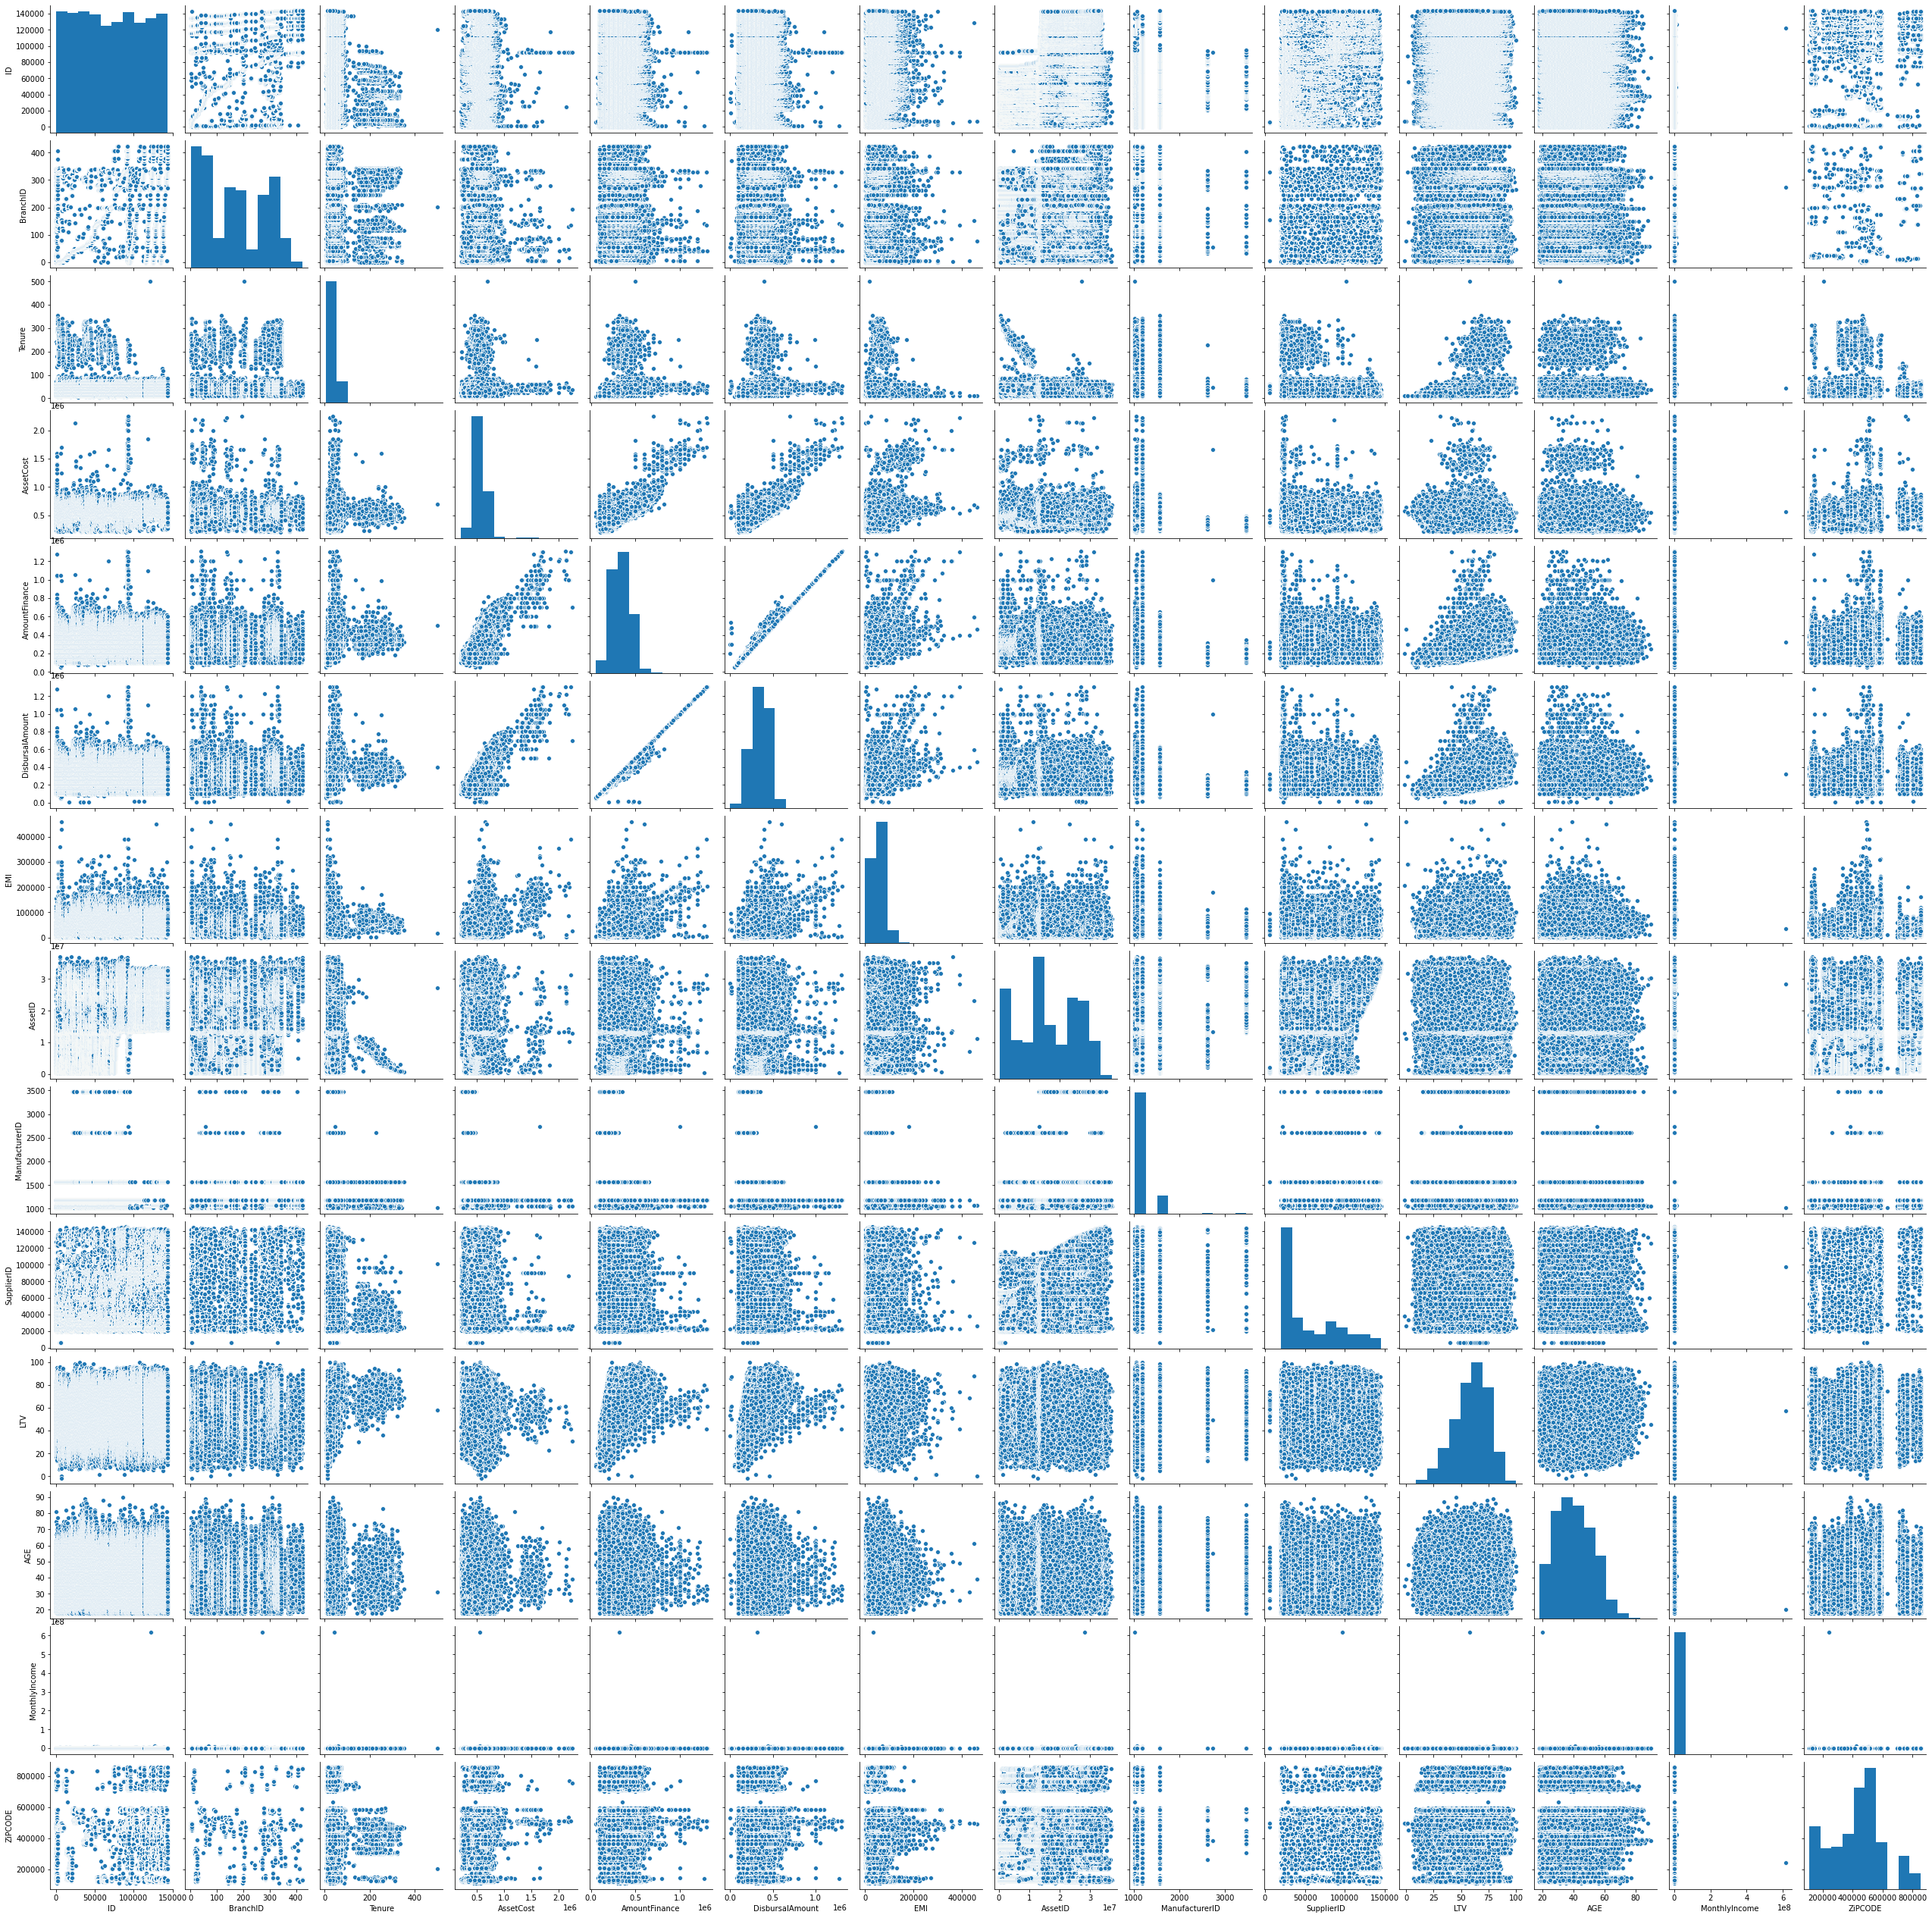

In [15]:
sns.pairplot(train_demo)

In [106]:
# Chreating function to visiualize the features

var = ['Frequency', 'InstlmentMode', 'LoanStatus','PaymentMode','SEX','State','Top-up Month']

def var_visual(var):
    feature = var
    train_demo[feature].value_counts(normalize = True).plot.bar(cmap = 'viridis', figsize = (10, 6))
    plt.xlabel(feature)

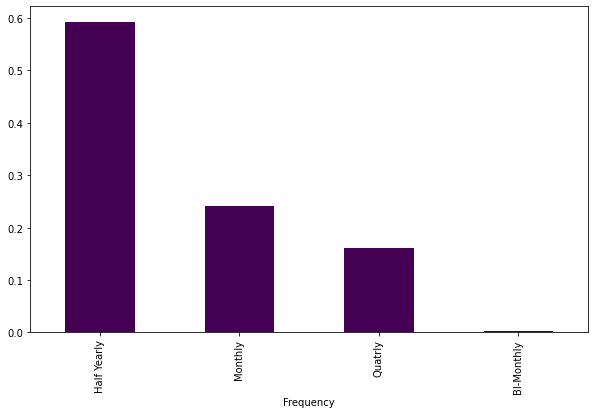

In [107]:
var_visual(var[0])

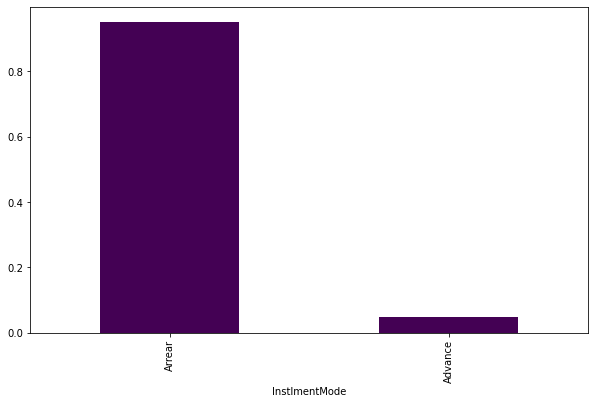

In [108]:
var_visual(var[1])

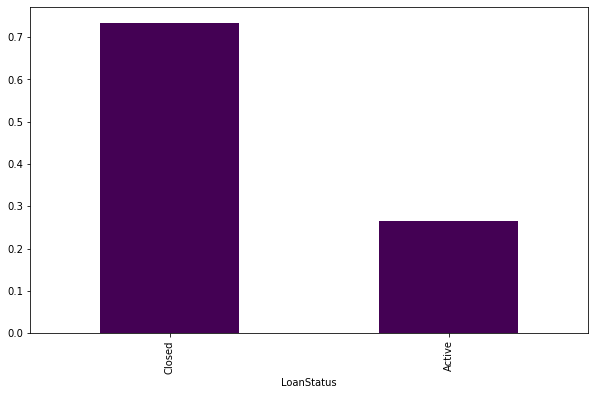

In [19]:
var_visual(var[2])

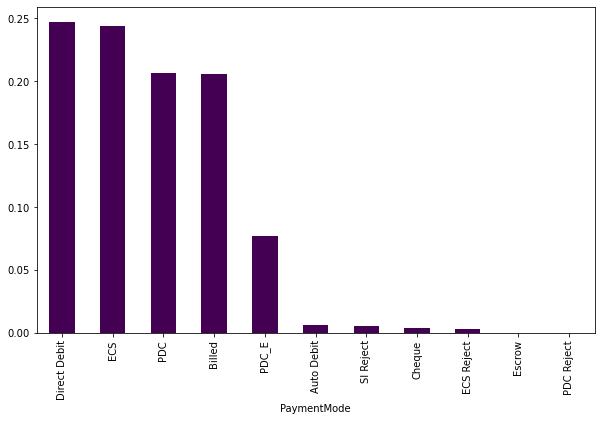

In [109]:
var_visual(var[3])

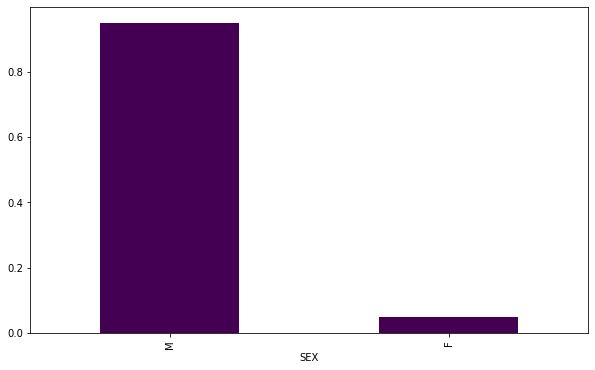

In [110]:
var_visual(var[4])

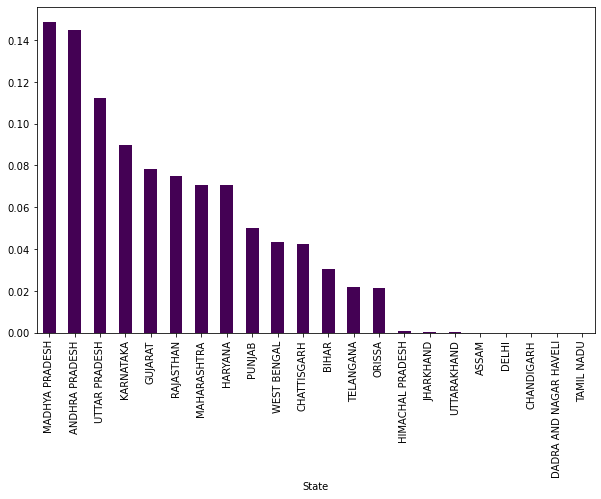

In [111]:
var_visual(var[5])

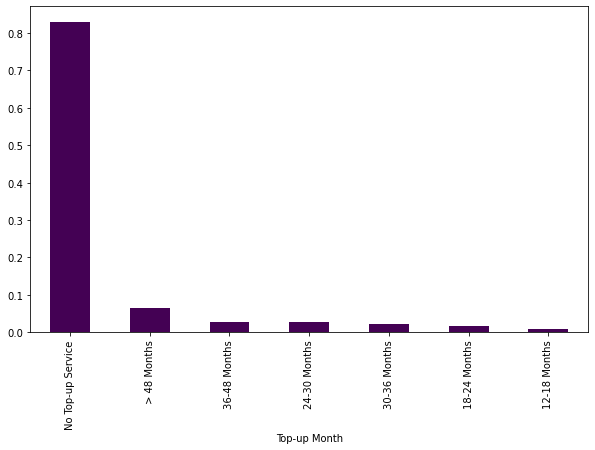

In [113]:
var_visual(var[6])

In [121]:
# Chreating function to visiualize the features

var_2 = ['Tenure', 'AssetCost', 'ManufacturerID', 'AmountFinance','DisbursalAmount','LTV','AGE','MonthlyIncome']

def var_visual_2(var_2):
    feature2 = var_2
    train_demo[feature2].value_counts(normalize = False).plot.box(cmap = 'viridis', figsize = (10, 6))
    plt.xlabel(feature2)

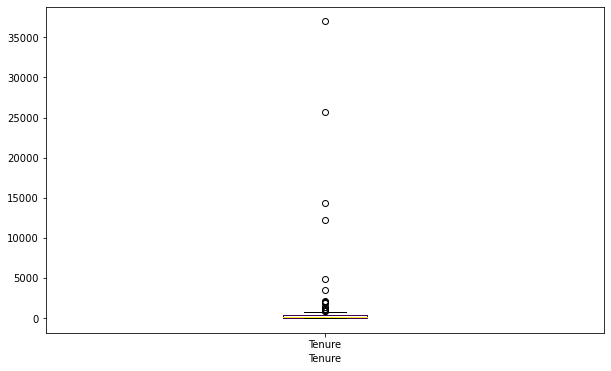

In [122]:
var_visual_2(var_2[0])

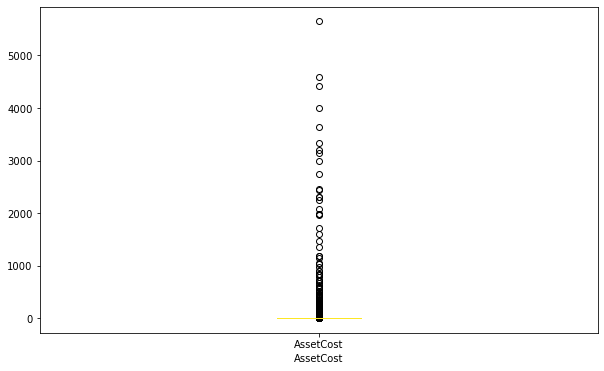

In [123]:
var_visual_2(var_2[1])

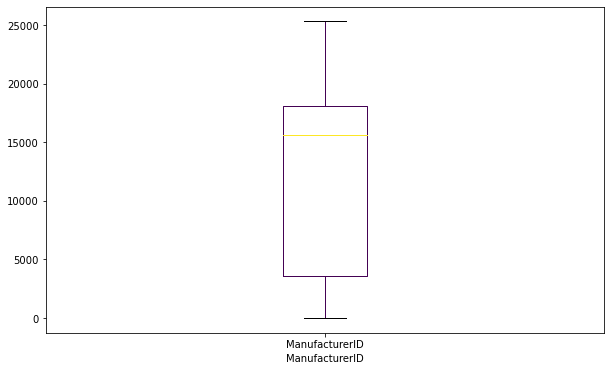

In [124]:
var_visual_2(var_2[2])

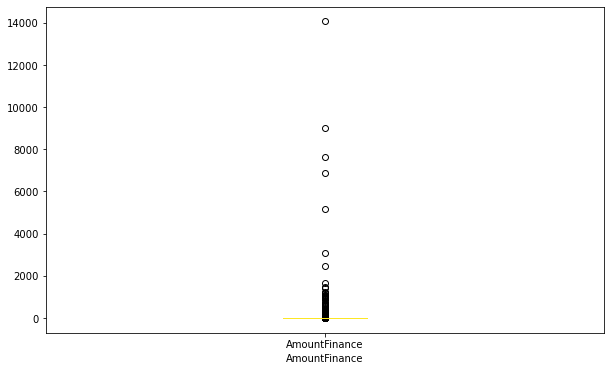

In [125]:
var_visual_2(var_2[3])

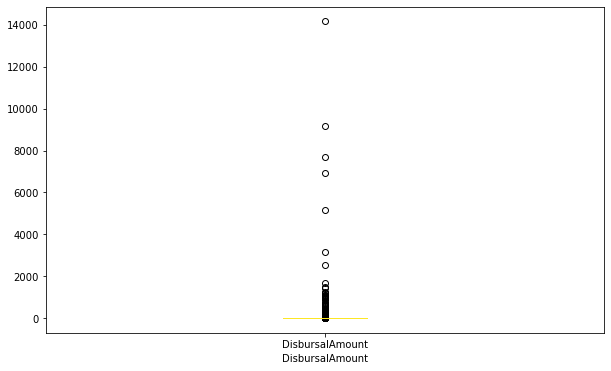

In [126]:
var_visual_2(var_2[4])

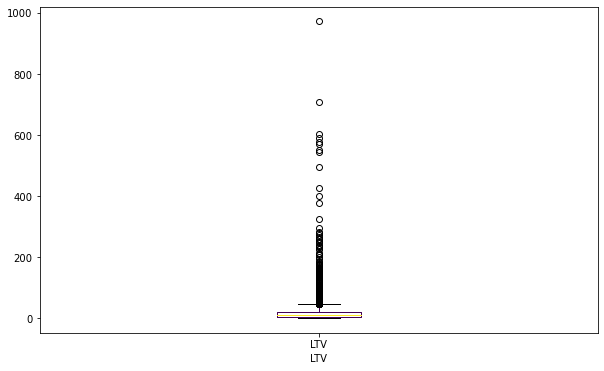

In [127]:
var_visual_2(var_2[5])

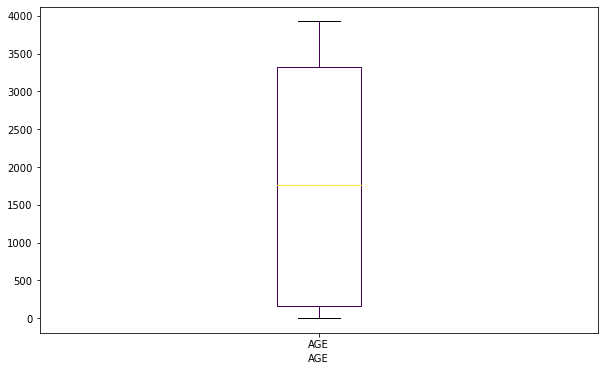

In [128]:
var_visual_2(var_2[6])

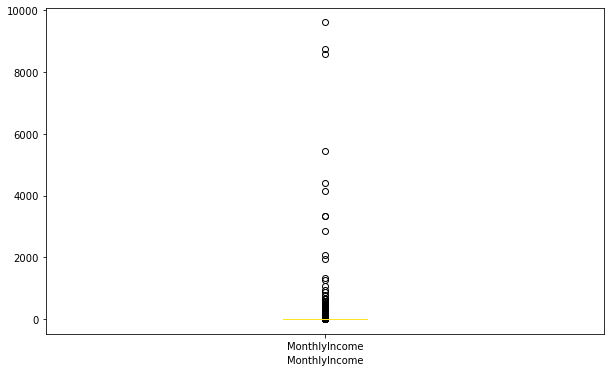

In [129]:
var_visual_2(var_2[7])

In [36]:
train_demo['State'].value_counts()

MADHYA PRADESH            19122
ANDHRA PRADESH            18629
UTTAR PRADESH             14449
KARNATAKA                 11569
GUJARAT                   10088
RAJASTHAN                  9668
MAHARASHTRA                9083
HARYANA                    9060
PUNJAB                     6420
WEST BENGAL                5557
CHATTISGARH                5448
BIHAR                      3913
TELANGANA                  2783
ORISSA                     2739
HIMACHAL PRADESH             74
JHARKHAND                    21
UTTARAKHAND                  12
ASSAM                        10
DELHI                         6
CHANDIGARH                    2
DADRA AND NAGAR HAVELI        1
TAMIL NADU                    1
Name: State, dtype: int64

In [37]:
test_demo.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              1
dtype: int64

In [39]:
train_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560844 entries, 0 to 560843
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ID                         560844 non-null  int64         
 1   SELF-INDICATOR             560844 non-null  bool          
 2   MATCH-TYPE                 560844 non-null  object        
 3   ACCT-TYPE                  560844 non-null  object        
 4   CONTRIBUTOR-TYPE           560844 non-null  object        
 5   DATE-REPORTED              557161 non-null  datetime64[ns]
 6   OWNERSHIP-IND              560844 non-null  object        
 7   ACCOUNT-STATUS             560844 non-null  object        
 8   DISBURSED-DT               528694 non-null  datetime64[ns]
 9   CLOSE-DT                   309086 non-null  object        
 10  LAST-PAYMENT-DATE          241561 non-null  datetime64[ns]
 11  CREDIT-LIMIT/SANC AMT      15159 non-null   object  

## Data Preprocessing

#### Imputing Missing values

In [63]:
# Creating Copy of train data as well as test data
df1 = train_demo.copy()
# df1_1 = train_bureau.copy()
df2 = test_demo.copy()

In [72]:
# Checking Missing value in sex feature

sex_missing = train_demo.loc[(train_demo['SEX'].isnull())]
sex_missing

df1['SEX'].fillna(method = 'ffill', inplace = True)
df1['SEX'].isnull().sum()


ID    Frequency InstlmentMode LoanStatus   PaymentMode  BranchID  \
19          23      Monthly       Advance     Closed           PDC         5   
98         103      Monthly        Arrear     Closed         PDC_E       194   
381        391      Monthly        Arrear     Closed         PDC_E       231   
673        696      Monthly        Arrear     Closed         PDC_E        24   
760        795      Monthly        Arrear     Closed         PDC_E        26   
790        836      Monthly        Arrear     Closed  Direct Debit        39   
796        842      Monthly        Arrear     Closed         PDC_E        41   
830        876      Monthly        Arrear     Closed  Direct Debit        54   
848        894      Monthly        Arrear     Active         PDC_E        54   
850        896      Monthly        Arrear     Closed  Direct Debit        54   
853        899      Monthly        Arrear     Closed           PDC        55   
866        912      Monthly        Arrear     Closed         PDC_E       292   
867        913      Monthly        Arrear     Closed         PDC_E       292   
979       1030      Monthly        Arrear     Closed         PDC_E        59   
981       1032      Monthly        Arrear     Closed           PDC        59   
1008      1059      Monthly        Arrear     Closed           PDC        59   
1016      1067      Monthly        Arrear     Closed  Direct Debit        59   
1031      1082      Monthly        Arrear     Closed           ECS        67   
1033      1084      Monthly        Arrear     Closed           ECS        67   
1064      1116      Monthly        Arrear     Active         PDC_E        71   
1092      1144      Quatrly        Arrear     Closed  Direct Debit        71   
1117      1169      Monthly        Arrear     Closed           ECS        46   
1140      1194      Monthly       Advance     Closed         PDC_E       133   
1547      1620      Monthly        Arrear     Closed         PDC_E        20   
17957    19197      Monthly        Arrear     Closed           ECS        24   
19771    21417      Monthly        Arrear     Closed           PDC        32   
22449    24235      Monthly       Advance     Closed           ECS        40   
28103    30182      Monthly        Arrear     Closed        Billed        48   
36615    39077      Monthly        Arrear     Closed         PDC_E        59   
64397    71060  Half Yearly        Arrear     Closed           PDC       199   
69477    76325      Quatrly        Arrear     Closed           ECS       246   
73992    81903      Monthly        Arrear     Closed  Direct Debit       279   
85337    94725      Monthly        Arrear     Closed           PDC        33   
86245    95704      Monthly        Arrear     Closed           ECS        10   
86595    96071      Monthly        Arrear     Closed           PDC        20   
88241    97790      Monthly        Arrear     Closed  Direct Debit        38   
90278    99984      Monthly        Arrear     Closed           ECS        72   
103070  115706      Monthly        Arrear     Closed           PDC         9   
112510  125854      Quatrly        Arrear     Closed           ECS        26   
112819  126210      Monthly        Arrear     Closed           ECS        41   
112844  126237      Monthly        Arrear     Closed           ECS        41   
112845  126238      Monthly        Arrear     Closed           ECS        41   
112846  126239      Monthly        Arrear     Closed           ECS        41   
112847  126240      Monthly        Arrear     Closed           ECS        41   
112848  126241      Monthly        Arrear     Closed           ECS        41   
112849  126242      Monthly        Arrear     Closed           ECS        41   
112850  126243      Monthly        Arrear     Closed           ECS        41   
112851  126244      Monthly        Arrear     Closed           ECS        41   
112852  126245      Monthly        Arrear     Closed           ECS        41   
112853  1262

In [82]:
# Age missing value imputation

# age_missing = train_demo.loc[(train_demo['AGE'].isnull())]
# age_missing

# Displaying Mean & Median of age
print("Age Mean - ", df1.AGE.mean())
print("Age Median - ", df1.AGE.median())

df1['AGE'].fillna(df1['AGE'].median(), inplace = True)
print("Meadian imputed in AGE column...")
print("Missing value after imputation - ", df1.AGE.isnull().sum())

Age Mean -  40.66449807625044
Age Median -  40.0
Meadian imputed in AGE column...
Missing value after imputation -  0


In [90]:
# Imputing Missings in Monthly Income -

print("Missing Values in Monthly Income feature - ", df1.MonthlyIncome.isnull().sum())
print("Mean - ", df1.MonthlyIncome.mean())
print("Median - ", df1.MonthlyIncome.median())

# filling missing with median
df1.MonthlyIncome.fillna(df1.MonthlyIncome.median(), inplace = True)
print("Missing filled.....")
print("Checking Missing after fill - ", df1.MonthlyIncome.isnull().sum())

Missing Values in Monthly Income feature -  0
Mean -  50297.24917243915
Median -  35833.33
Missing filled.....
Checking Missing after fill -  0


In [101]:
# Imputing Missing values in ZIPCODE
# df1.loc[df1.ZiPCODE.isnull()]
zip_missing = df1.ZiPCODE.isnull().sum()
print("Missing Values in Zipcode - ", zip_missing)

# filling missing value by 'ffill'
df1.ZiPCODE.fillna(method = 'ffill', inplace = True)
print("Missing after filling : ", df1.ZiPCODE.isnull().sum())

Missing Values in Zipcode -  372
Missing after filling :  0


In [102]:
# Checking missing In maturity
print('Missing in Maturity Date - ', df1.MaturityDAte.isnull().sum())

# filling by 'ffill'
df1.MaturityDAte.fillna(method = 'ffill', inplace = True)
print("Missing after fill - ", df1.MaturityDAte.isnull().sum())

Missing in Maturity Date -  1
Missing after fill -  0


In [103]:
df1.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           0
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                    0
AGE                    0
MonthlyIncome          0
City               11256
State                  0
ZiPCODE                0
Top-up Month           0
dtype: int64

In [104]:
# Filling Missing values in Test set

df2['SEX'].fillna(method = 'ffill', inplace = True)
df2['AGE'].fillna(df1['AGE'].median(), inplace = True)
df2.MonthlyIncome.fillna(df1.MonthlyIncome.median(), inplace = True)
df2.ZiPCODE.fillna(method = 'ffill', inplace = True)
df2.ManufacturerID.fillna(method = 'ffill', inplace = True)

In [105]:
df2.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       0
SupplierID           0
LTV                  0
SEX                  0
AGE                  0
MonthlyIncome        0
City                 0
State                0
ZiPCODE              0
dtype: int64

#### Correlation

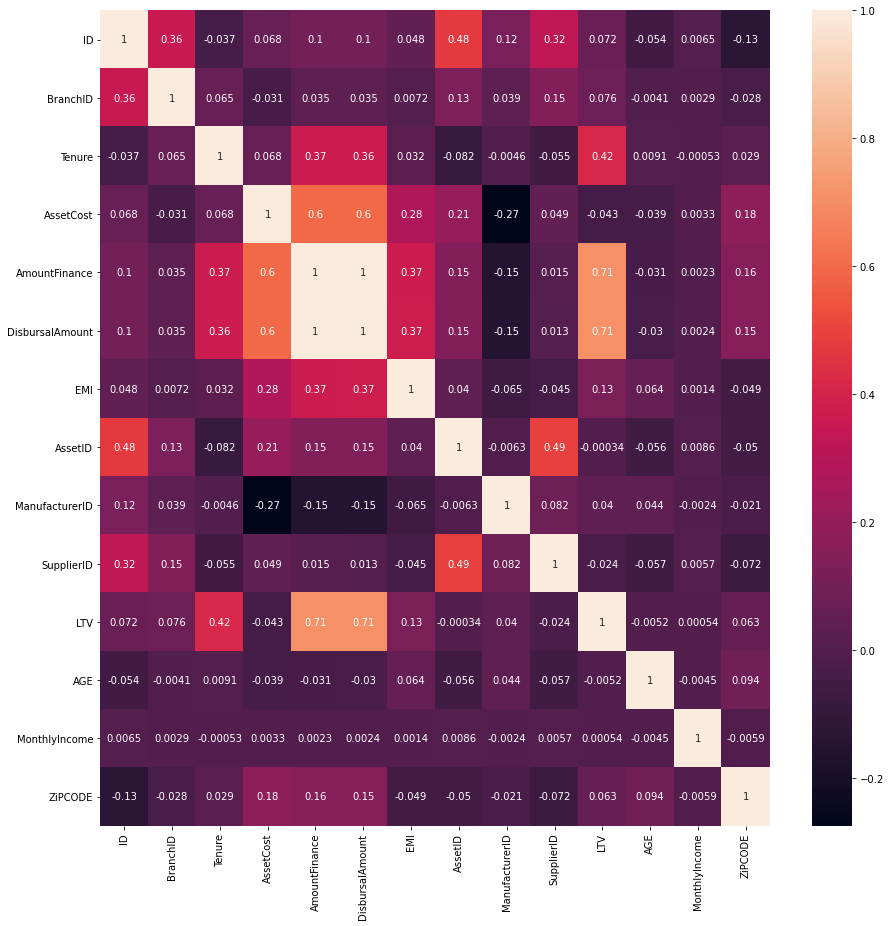

In [44]:
plt.subplots(figsize=(15,15))
sns.heatmap(train_demo.corr(method = 'pearson'), annot = True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))